In [ ]:
%pip install numpy==2.2.3 pandas==2.2.3 matplotlib==3.10.0 statsmodels==0.14.4

A time series is a sequence of data points collected over time, typically at regular intervals (E.g. stock prices, weather, or sales figures over a specified period). Time series data is characterized by its chronological order, which allows for the analysis of trends, patterns, and seasonal variations.

## Dates in Python

In [51]:
from datetime import datetime, timedelta
import pandas as pd

now = datetime.now()
now.day

custom_date = datetime(2023, 5, 17, 15, 30, 0)
custom_date.strftime('%d-%m-%y')

date_str = "17-05-2023 21:15:13"
datetime.strptime(date_str, '%d-%m-%Y %H:%M:%S')

now + timedelta(hours=100)

from datetime import date
from dateutil.relativedelta import relativedelta
date(2020, 5, 15) + relativedelta(months=5)

unix = 17030299383
datetime.utcfromtimestamp(unix)

/var/folders/pt/_9kmkz213vvg6ct_bwr1sjw00000gp/T/ipykernel_81196/3993331154.py:20: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  datetime.utcfromtimestamp(unix)


datetime.datetime(2509, 9, 1, 22, 43, 3)

## Time Series in pandas

In [63]:
pd.Timestamp("2024-02-11")

pd.Timestamp.now(tz="UTC")

date_range = pd.date_range(start="2024-01-01", periods=12, freq="ME")

date_range.to_period('M').to_timestamp('M')

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [77]:
data = {"date_str": ["2023-01-01", "2023-06-15", "2023-12-31"]}
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df["date_str"])

df["date_utc"] = df["date"].dt.tz_localize("UTC")  # Set UTC time zone
df["date_ny"] = df["date_utc"].dt.tz_convert("America/New_York") 
df["date_ny"]

df[(df["date"] >= "2023-01-01") & (df['date'] < "2023-06-30")]

df["year"] = df['date'].dt.year

(df["date"] - df["date"].min()).dt.days

0      0
1    165
2    364
Name: date, dtype: int64

In [96]:
date_range = pd.date_range(start="2023-01-01", periods=365, freq="D")  # Daily frequency
data = {"date": date_range, "value": np.random.randint(10, 100, size=len(date_range))}
df = pd.DataFrame(data)

df = df.set_index('date')

df.asfreq('h')

df.resample(rule='YE').sum()

df.groupby(pd.Grouper(freq="W-MON")).mean()

,value
date,
2023-01-02,57.000000
2023-01-09,41.571429
2023-01-16,64.857143
2023-01-23,48.714286
2023-01-30,40.428571
2023-02-06,50.714286
2023-02-13,53.285714
2023-02-20,49.285714
2023-02-27,35.428571


In [100]:
date_range = pd.date_range(start="2023-01-01", periods=12, freq="ME")
sales = np.random.randint(100, 500, size=len(date_range))

df = pd.DataFrame({"date": date_range, "sales": sales}).set_index("date")

print(df["sales"])
print(df["sales"].shift(1))
print(df["sales"].shift(-1))

date
2023-01-31    210
2023-02-28    252
2023-03-31    222
2023-04-30    456
2023-05-31    201
2023-06-30    340
2023-07-31    420
2023-08-31    290
2023-09-30    316
2023-10-31    150
2023-11-30    391
2023-12-31    180
Name: sales, dtype: int64
date
2023-01-31      NaN
2023-02-28    210.0
2023-03-31    252.0
2023-04-30    222.0
2023-05-31    456.0
2023-06-30    201.0
2023-07-31    340.0
2023-08-31    420.0
2023-09-30    290.0
2023-10-31    316.0
2023-11-30    150.0
2023-12-31    391.0
Name: sales, dtype: float64
date
2023-01-31    252.0
2023-02-28    222.0
2023-03-31    456.0
2023-04-30    201.0
2023-05-31    340.0
2023-06-30    420.0
2023-07-31    290.0
2023-08-31    316.0
2023-09-30    150.0
2023-10-31    391.0
2023-11-30    180.0
2023-12-31      NaN
Name: sales, dtype: float64


## Time Series Components

The **level** is the baseline component that is present in any time series. Plotted without other components, it would be a straight line. 

A **trend** represents a long-term increase or decrease in the data.

A **seasonality** denotes that a time series is affected by one or more seasonal factors of a fixed and known period, such as the time of the year.

A **cycle** occurs when there are rises and falls in the data that are not of a fixed frequency and lasts multiple years, usually due to economic conditions.

The **error** component is the residual unexplainable component that "remains" after accounting for the other components.

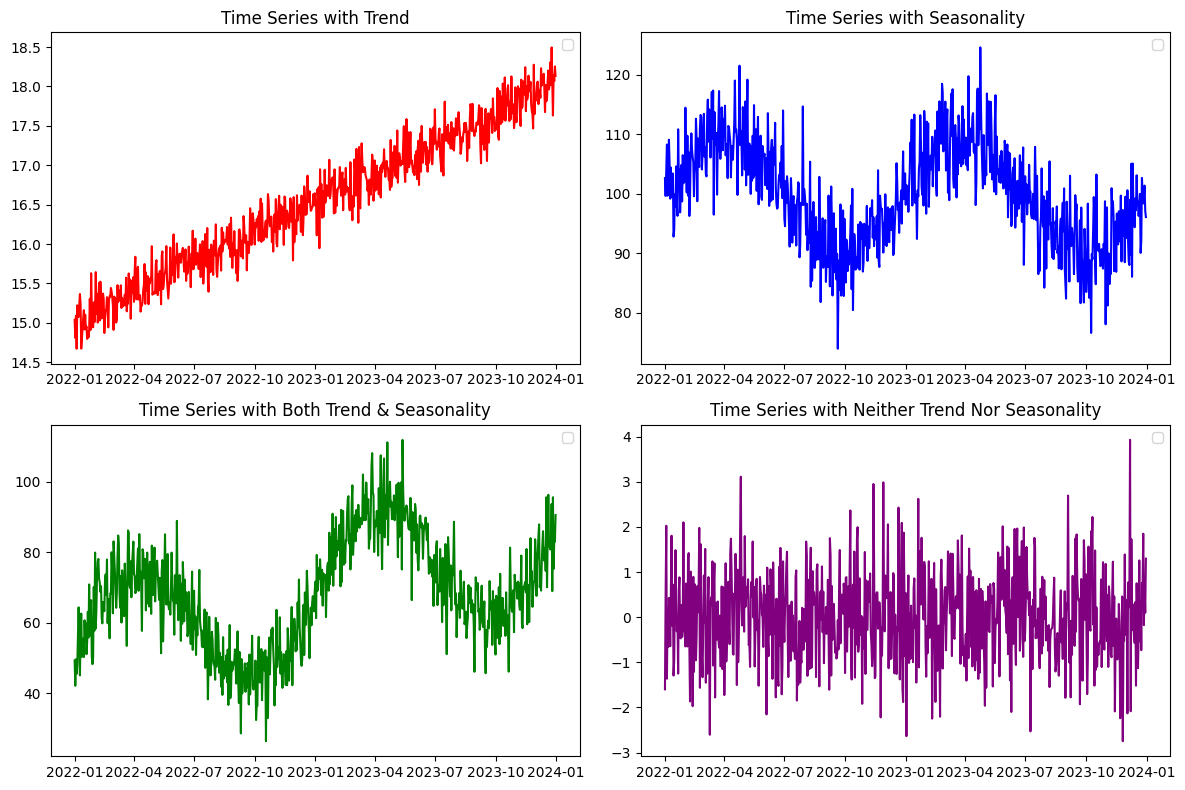

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.simplefilter('ignore', UserWarning)

# Set seed for reproducibility
np.random.seed(42)

# Generate a date range (daily observations over two years)
date_range = pd.date_range(start="2022-01-01", periods=730, freq="D")

# 1️⃣ Time Series with Seasonality Only (e.g., Monthly Temperature Cycle)
seasonality = 100 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 5, 730)

# 2️⃣ Time Series with Trend Only
trend = np.linspace(15, 18, 730) + np.random.normal(0, 0.2, 730)

# 3️⃣ Time Series with Both Trend & Seasonality (e.g., Sales Data)
trend_seasonality = (50 + 0.05 * np.arange(730) +
                     20 * np.sin(2 * np.pi * date_range.dayofyear / 365) +  # Stronger seasonality
                     np.random.normal(0, 7, 730))

# 4️⃣ Time Series with Neither Trend nor Seasonality (Pure White Noise)
white_noise = np.random.normal(0, 1, 730)  # Random values with no pattern

# Create a DataFrame for easy handling
df = pd.DataFrame({
    "Date": date_range,
    "Seasonality": seasonality,
    "Trend": trend,
    "Trend + Seasonality": trend_seasonality,
    "White Noise": white_noise
})
df.set_index("Date", inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df["Trend"], label="", color="red")
plt.title("Time Series with Trend")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df["Seasonality"], label="", color="blue")
plt.title("Time Series with Seasonality")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df["Trend + Seasonality"], label="", color="green")
plt.title("Time Series with Both Trend & Seasonality")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df["White Noise"], label="", color="purple")
plt.title("Time Series with Neither Trend Nor Seasonality")
plt.legend()

plt.tight_layout()
plt.show()

# Ciclo (difficile da vedere in un grafico)
# Q: una time series può avere più periodi stagionali? Esempio?

## Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series.

The autocorrelation function (ACF) is used to see how the correlations change depending on the lag.

si ha una correlazione con l'anno precedente

## Time Series Transformations

If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful. In general, making the size of the seasonal variation about the same across the whole series makes the forecasting model simpler.

### Logarithmic Transformation

trasformazioni box-cox

### Moving Averages

A moving average of order $m$ is an estimate of the trend-cycle at time $t$, obtained by averaging values of the time series within $k$ periods of $t$, where $k = (m - 1) / 2$. E.g. a 3-MA averages the middle observation, one observation before and one after. Averaging eliminates some of the randomness in the data, leaving a smoother time series.

## Time Series Decomposition

Assuming an additive decomposition, a time series can be written as $Y = S + T + R$, where $Y$ is the data, $S$ is the seasonal component, $T$ is the trend-cycle component, and $R$ is the remainder component. Assuming a multiplicative decomposition, we could write $Y = S * T * R$.

An additive decomposition is appropriate if the magnitude of seasonal/trend-cycle variations does not vary with the level of the time series. When the variations are proportional to the level of the time series, then a multiplicative decomposition is more suitable.

## Forecasting

### Naive Methods

Andamenti semplici per la prevsisione delle timeseries 

### Exponential smoothing

metodi statistici che permettono di combinare i metodi precedenti. Si intende fare previsioni basate su una media pesata di osservazioni passate con i pesi che crescono esponenzialmente man mano che ci allontaniamo
-MEDIA PESATA DELLE ULTIME INFORMAZIONI : in mezzo tra caso in cui consideravamo la media dei valori e il caso in cui prendevamo l'ultimo valore. Metodo adatto per le timeseries che non hanno nè trend nè stagionalità.
-si può considerare un equazione che modelli il trend e una che modella il livello della timeseries. può esserci un problema, per lunghi periodi di previsione diventa abbastanza realistico che si continui ad avere sempre lo stesso trend. Ad esempio se prevediamo la temperatura globale non è detto che si avrà fino all'infinito lo stesso trend arriverà un momento di stabilizzazione 
-esiste il metodo Holt-winter a cui viene aggiunta un' equazione che modella la componente stagionale. esistono due varianti: una in cui trend e stagionalità vengono considerate da sommare e una in cui trend e stagionalità vengono considerati come componenti da moltiplicare.

si può creare un metodo per ogni combinazione di trend e stagionalità (as esempio: trend additivo e stagionalità moltiplicativa; trend nullo e stagionalità additiva etc..) si può usare quindi qualsiasi combinazione delle componenti delle time series

### ARIMA

descrivono le autocorrelazioni presenti nei dati
STAZIONARITA': una serie storica è stazionaria quando un valore non dipende dal periodo dove la serie è osservata. non ha pattern predicibili su lungo periodo, infatti ogni suo valore non dipende dal periodo. SERIE CON TREND E STAGIONALITA' NON SONO STAZIONARIE.